In [47]:
%matplotlib inline 
# %matplotlib qt 

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform as ran
from IPython.display import clear_output, display


tmin = 80e6
tmax = 99e6
numTraps = 1
frequencies = np.linspace(tmin,tmax,15)
pi2 = 2*np.pi

In [49]:
fidelity = 1e6
wf = 1e3
sampleRate=1.024e9
timestep = 1.0/sampleRate
tableLength = int(sampleRate/wf)
duration = 0.00001
numSamples = int(duration * sampleRate)
print(timestep,tableLength,numSamples)

9.765625e-10 1024000 10240


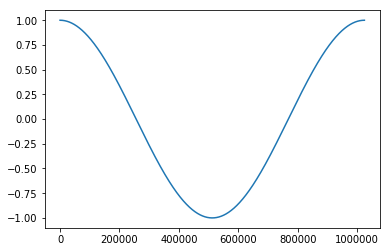

In [50]:
tableInd = np.linspace(0,tableLength,num=tableLength+1)
coeff = pi2/tableLength
waveTable = [np.exp((s*coeff)*1j) for s in tableInd]

plt.plot(tableInd,np.real(waveTable))
plt.show()
inp = []

In [51]:
def genWave(freq,phase):
    pha = int(phase*tableLength)
    wave = []
    for s in range(numSamples):
        if (pha > tableLength):
            pha -= int(tableLength)
        if pha < 0:
            pha += int(tableLength)
        wave.append(waveTable[pha])
        pha += int(freq/wf)
    return wave,phase

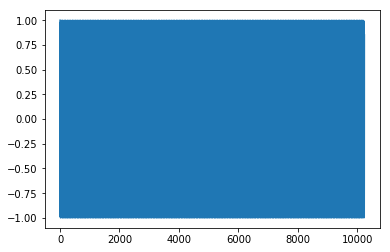

In [20]:
# print(np.real(genWave(90,0,numSamples)[0]))
plt.plot(np.linspace(1,numSamples,num=numSamples),np.real(genWave(90e6,0)[0]))

In [53]:
'''
Minimization
'''
def findMin(lb_guess,ub_guess,fid,wv,freq):
    tempwaves = []
    maxima = []
    for i in range(lb_guess,ub_guess,int(tableLength/fid)):
        currTempWave = genWave(freq,i/tableLength)
        tempwaves.append(np.add(currTempWave[0],wv))
        maxima.append(np.amax(tempwaves[-1]))
#         plt.plot(x,tempwaves[-1])
#         plt.show()
    pind = np.argmin(maxima)
    wv = tempwaves[pind]
#     print("Frequency: ", w,"Minimized at index : ",pind)
    
    return wv,(lb_guess+pind*tableLength/fid)


# plt.figure(figsize=(15,10))
# x = np.linspace(0,numSamples,numSamples)
# num_traps=[]
# peaks = []
# for i in range (1,50):
#     fidelity = 1e1
#     wave = []
#     phases = [0]
#     frequencies = [83e6+k*1e6 for k in range(i)]
#     print(frequencies)
#     tmin = frequencies[0]
#     tmax = frequencies[-1]
#     for w in frequencies:
#         #Save first cosine wave
#         print(w)
#         if w==tmin:
#             wave = (genWave(w,0))[0]
#         else:
#             data = findMin(0,tableLength,fidelity,wave,w)
#             wave = data[0]
#             phases.append(data[1])
#     plt.show()
#     plt.figure(figsize=(15,10))
#     plt.plot(x,np.real(wave))
#     plt.show()
#     peaks.append[]
#     print(phases)            

   

In [27]:
phases=np.delete(phases)

TypeError: delete() missing 1 required positional argument: 'obj'

<Figure size 1080x720 with 0 Axes>

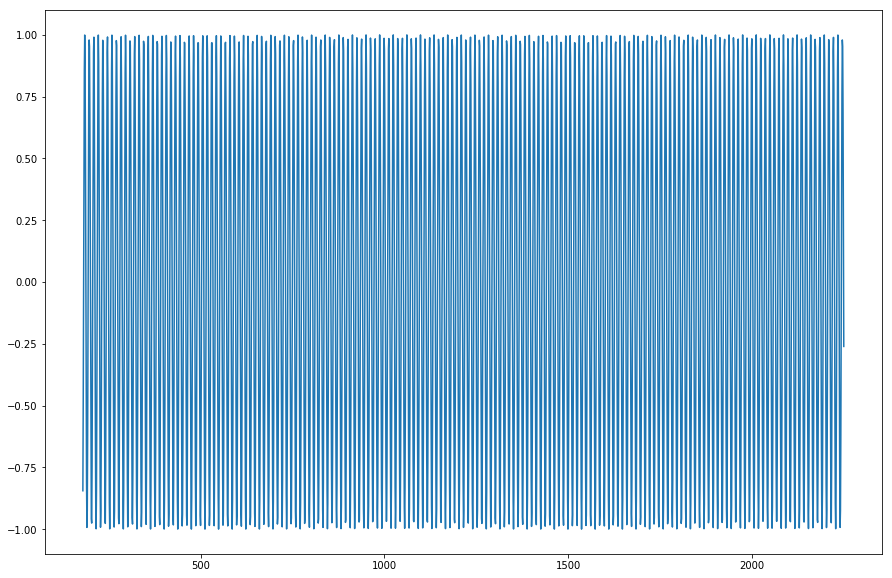

[0.]


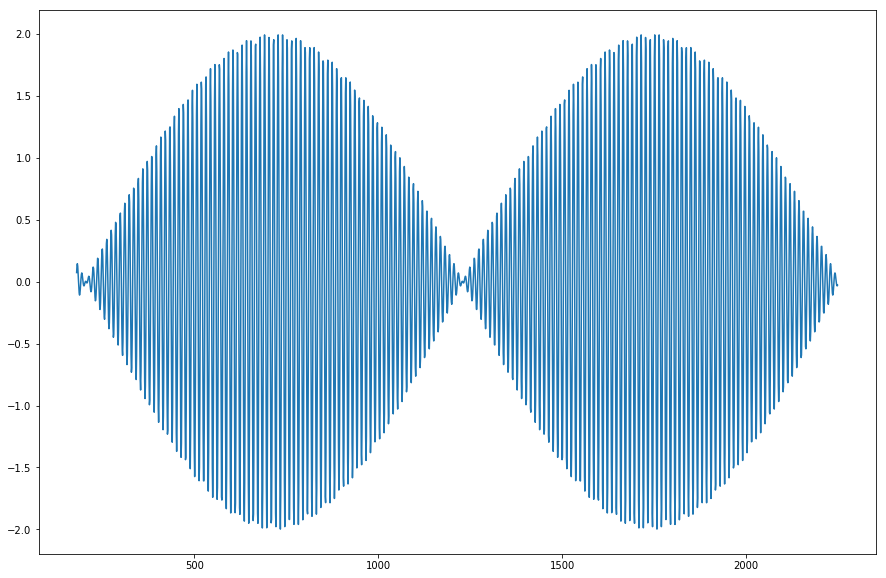

[0.         0.29905869]


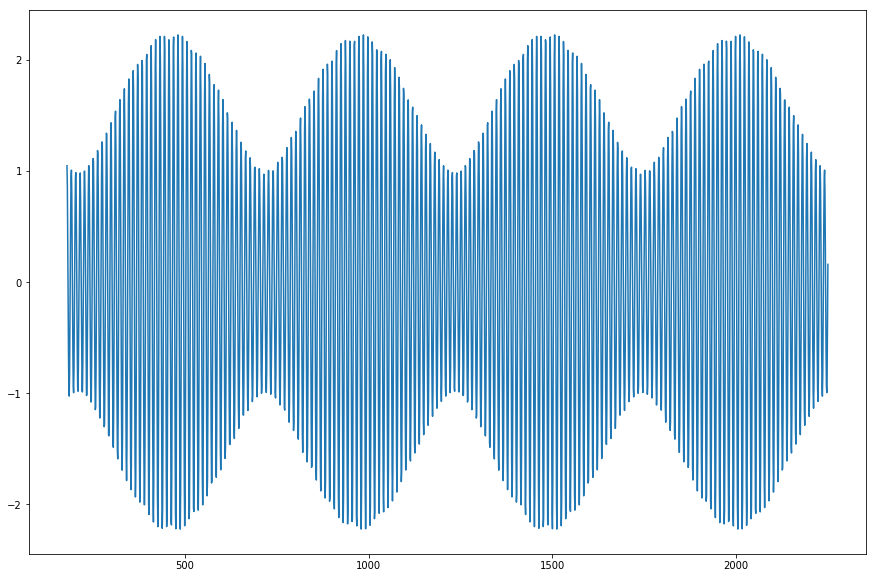

[0.         0.29905869 0.09556645]


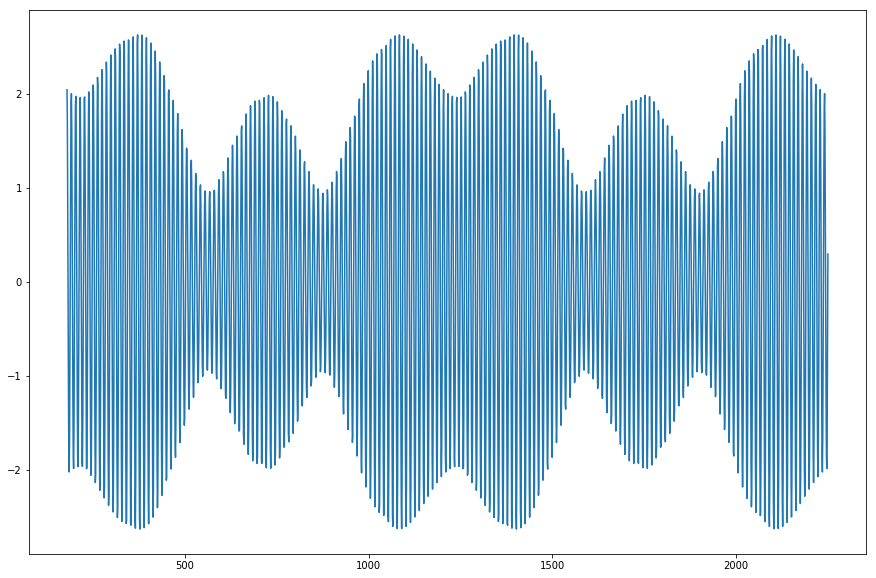

[0.         0.29905869 0.09556645 0.89104395]


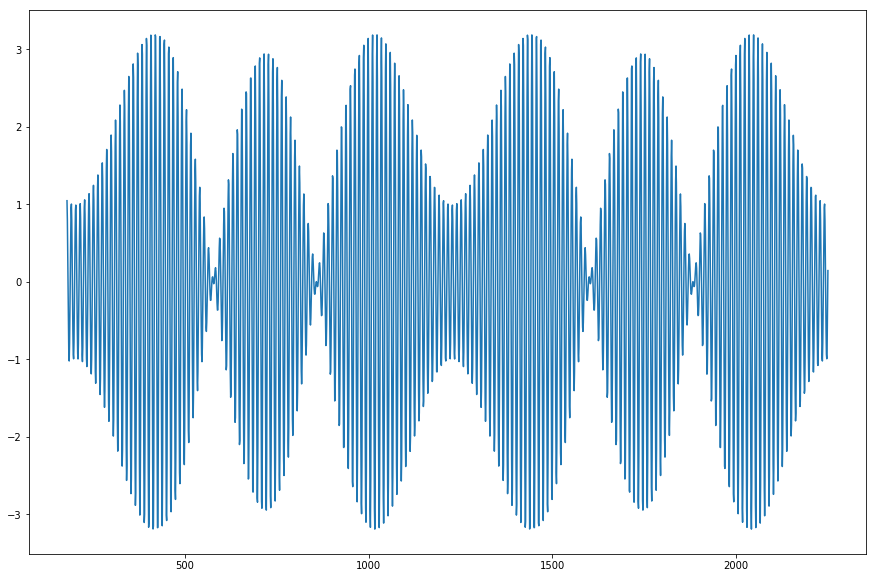

[0.         0.29905869 0.09556645 0.89104395 0.19714753]


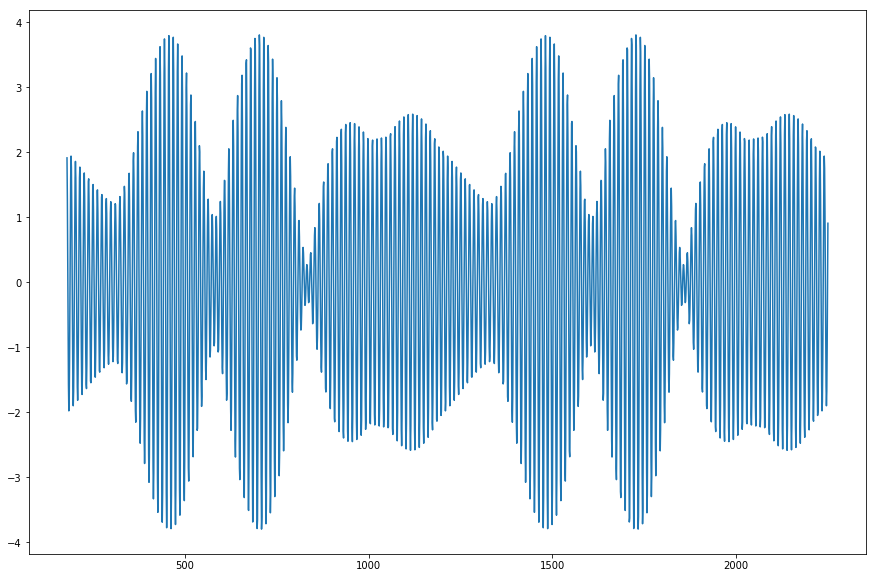

[0.         0.29905869 0.09556645 0.89104395 0.19714753 0.61455295]


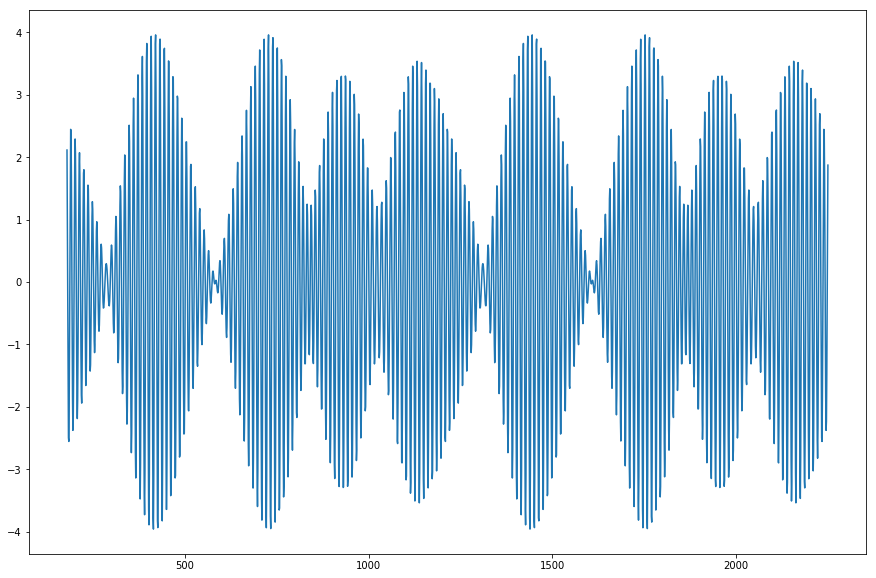

[0.         0.29905869 0.09556645 0.89104395 0.19714753 0.61455295
 0.57368859]


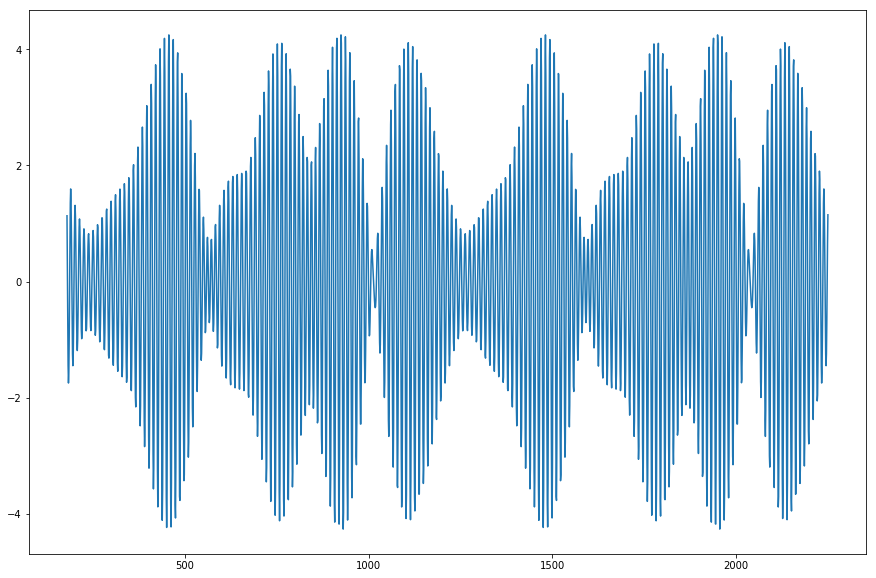

[0.         0.29905869 0.09556645 0.89104395 0.19714753 0.61455295
 0.57368859 0.71215353]


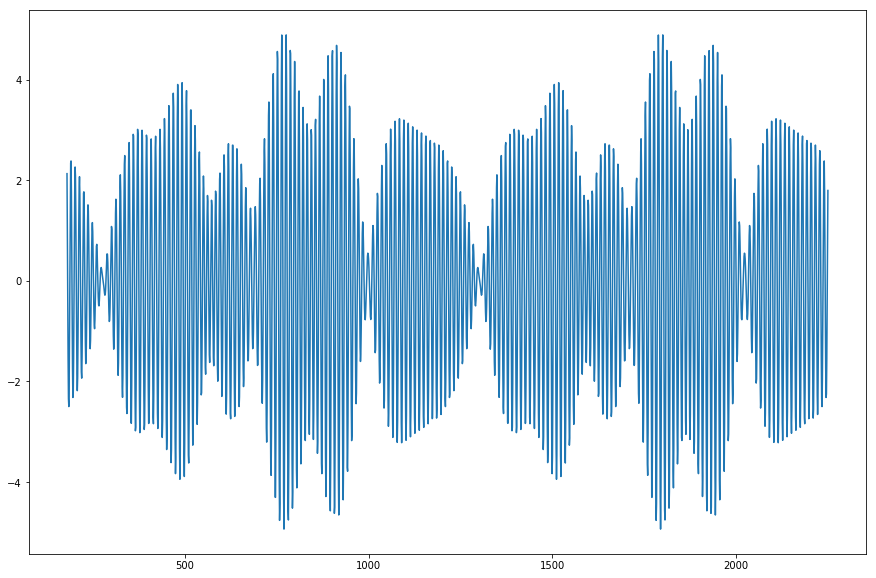

[0.         0.29905869 0.09556645 0.89104395 0.19714753 0.61455295
 0.57368859 0.71215353 0.        ]


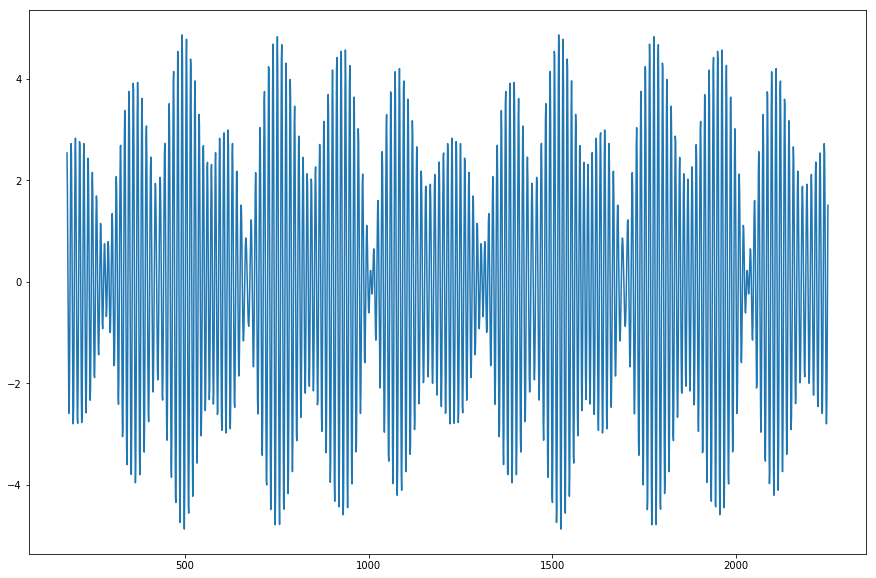

[0.         0.29905869 0.09556645 0.89104395 0.19714753 0.61455295
 0.57368859 0.71215353 0.         0.64444336]


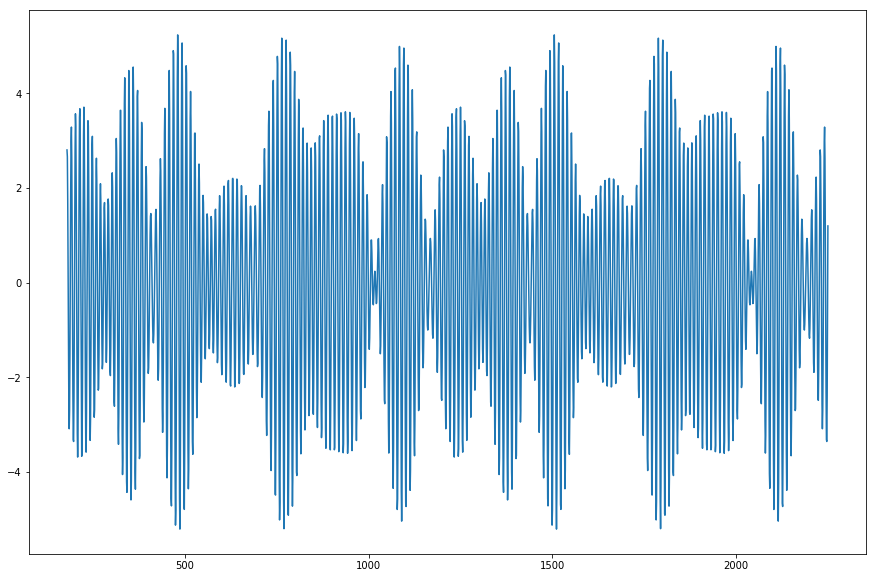

[0.         0.29905869 0.09556645 0.89104395 0.19714753 0.61455295
 0.57368859 0.71215353 0.         0.64444336 0.44455295]


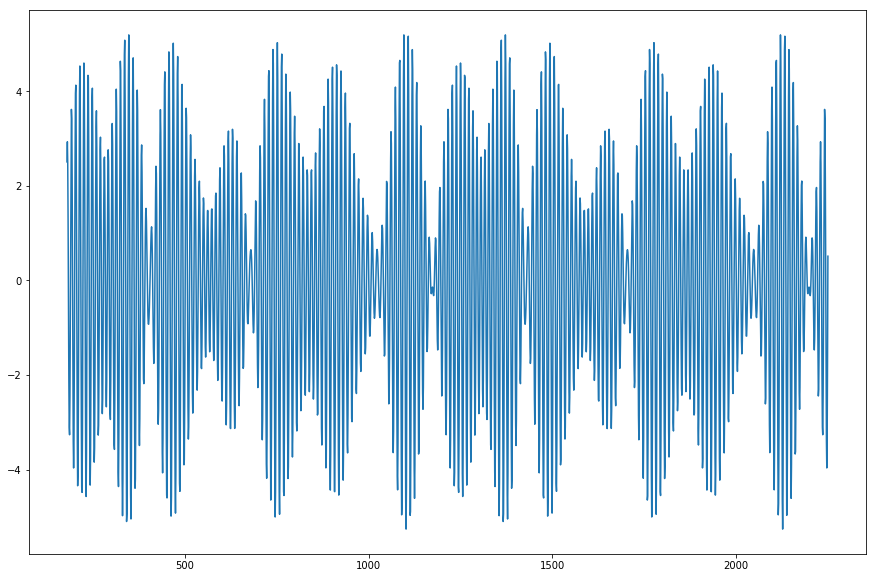

[0.         0.29905869 0.09556645 0.89104395 0.19714753 0.61455295
 0.57368859 0.71215353 0.         0.64444336 0.44455295 0.17871587]


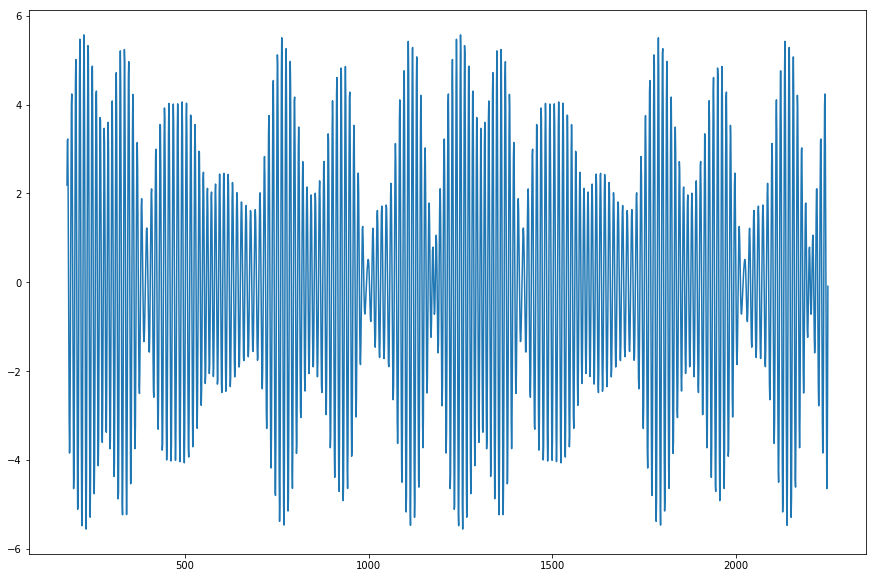

[0.         0.29905869 0.09556645 0.89104395 0.19714753 0.61455295
 0.57368859 0.71215353 0.         0.64444336 0.44455295 0.17871587
 0.        ]


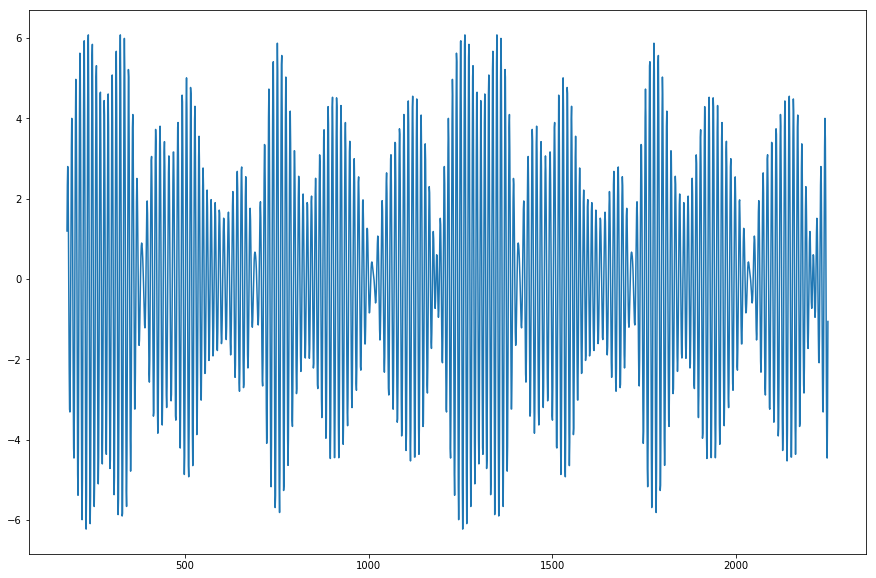

[0.         0.29905869 0.09556645 0.89104395 0.19714753 0.61455295
 0.57368859 0.71215353 0.         0.64444336 0.44455295 0.17871587
 0.         0.61656169]


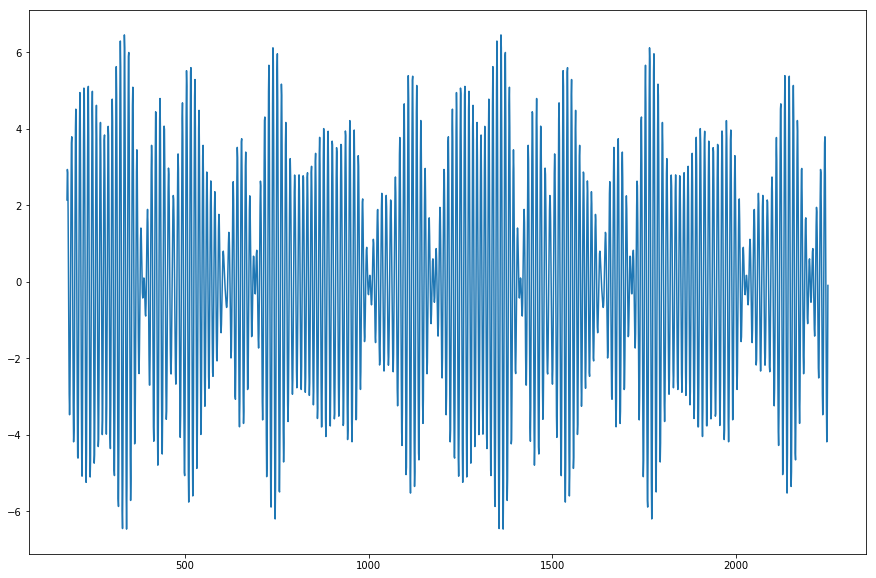

[0.         0.29905869 0.09556645 0.89104395 0.19714753 0.61455295
 0.57368859 0.71215353 0.         0.64444336 0.44455295 0.17871587
 0.         0.61656169 0.        ]


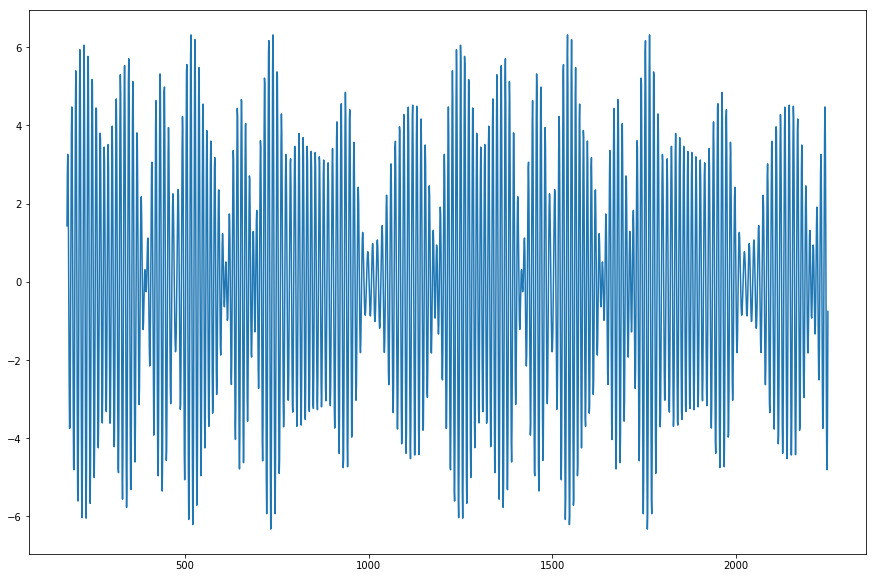

[0.         0.29905869 0.09556645 0.89104395 0.19714753 0.61455295
 0.57368859 0.71215353 0.         0.64444336 0.44455295 0.17871587
 0.         0.61656169 0.         0.39818959]


In [ ]:
'''
Minimization
'''
plt.figure(figsize=(15,10))
x = np.linspace(0,numSamples,numSamples)

best_guess_wave = []
initial_guess = 0
num_traps=[]
peaks = []
for i in range (1,50):
    fidelity = 1e1
    wave = []
    phases = [0]
    frequencies = [83e6+k* 1e6 for k in range(i)]
    tmin = frequencies[0]
    tmax = frequencies[-1]
    for w in frequencies:
        if w==tmin:
                wave = (genWave(w,0))[0]
                guess_wave = (genWave(w,0))[0]
        else:
            lb_guess = initial_guess #left bound of min phase
            ub_guess = tableLength #right bound of min phase
            #Save first cosine wave
            for fidelity in [1e1,1e2,1e3,1e4,1e5,1e6]:
#                     print("INITIAL: Fid: ",fidelity, "lower: ",lb_guess,"upper: ", ub_guess)
                    data = findMin(lb_guess,ub_guess,fidelity,wave,w)
                    lb_guess = int(data[1]-(tableLength/fidelity)/2)
                    if lb_guess < 0:
                        lb_guess = 0
                    ub_guess = int(data[1]+(tableLength/fidelity)/2)
                    if ub_guess > tableLength:
                        ub_guess = tableLength
                    best_guess_wave = data[0]
#                     print("FINAL: Fid: ",fidelity, "lower: ",lb_guess,"upper: ", ub_guess)

                    if fidelity == 1e6:
                        wave=best_guess_wave
                        phases.append(data[1])
#                         print("FREQUENCY: ", w,"PHASE: ",phases[-1])
            wave = best_guess_wave
    plt.show()
    plt.figure(figsize=(15,10))
    plt.plot(x[180:2250],np.real(wave)[180:2250])
    plt.show()
    print(np.divide(phases,tableLength)) 
    num_traps.append(len(frequencies))
    peaks.append(np.amax(wave))

plt.figure(figsize=(15,10))
plt.scatter(num_traps,peaks)
plt.show()

In [44]:
'''
Random Phase
'''
# plt.figure(figsize=(15,10))

# plt.ylim(bottom=-32,top=32)
x = np.linspace(0,10000,10010)

sinewaves = [genWave(y,0) for y in range(tmin,tmax)]
sin = np.sum(sinewaves,axis=0)

plt.plot(x,sin)
plt.show()

maxvals = []
for i in range(trials):
    plt.ylim(bottom=-32,top=32)
    
    sinewaves = [genWave(w,ran(0,pi2)) for w in range(tmin,tmax)]
    sin = np.sum(sinewaves,axis=0)

    maxvals.append(np.amax(sin))
        
    plt.plot(x,sin)
    plt.show()
    print(maxvals[-1])
plt.plot(np.linspace(1,trials,num=trials),maxvals)

plt.show()

TypeError: 'float' object cannot be interpreted as an integer

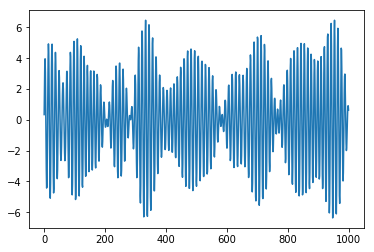

[0, 7037, 9080, 1094, 8060, 6642, 245, 5848, 2138, 2996, 4496, 5919, 8489, 7956, 5931]


In [244]:
domain = 1000
plt.plot(x[:domain],np.real(wave)[:domain])
plt.show()
print(phases)

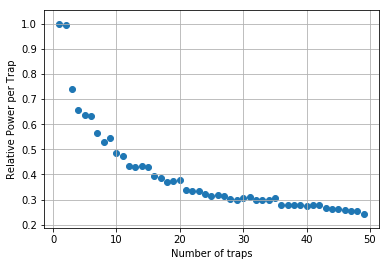

In [77]:

plt.figure(figsize=(6,4))
plt.grid()
plt.scatter(num_traps,np.divide(peaks,num_traps))
plt.ylabel("Relative Power per Trap")
plt.xlabel("Number of traps")


plt.show()

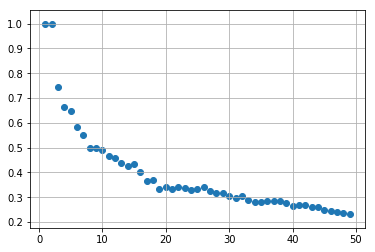

In [75]:
plt.figure(figsize=(6,4))
plt.grid()
plt.scatter(num_traps,np.divide(halfpeaks,num_traps))
plt.show()

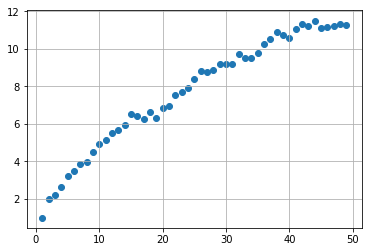

In [74]:
plt.figure(figsize=(6,4))
plt.grid()
plt.scatter(num_traps,(halfpeaks))
plt.show()


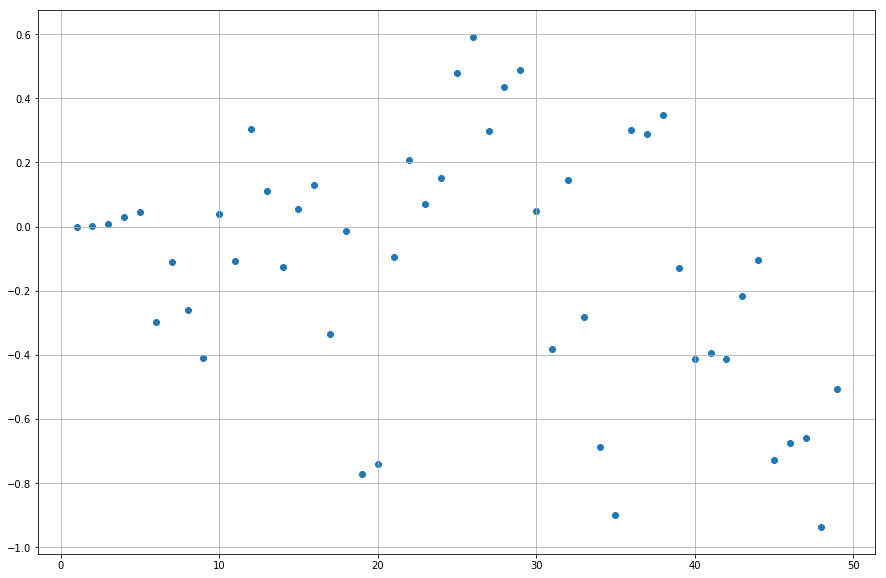

In [81]:
plt.figure(figsize=(15,10))
plt.grid()
plt.scatter(num_traps,np.subtract(halfpeaks,peaks))
plt.show()

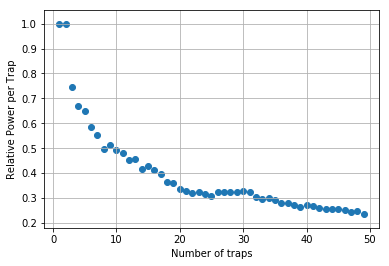

In [83]:

plt.figure(figsize=(6,4))
plt.grid()
plt.scatter(num_traps,np.divide(peaks,num_traps))
plt.ylabel("Relative Power per Trap")
plt.xlabel("Number of traps")


plt.show()

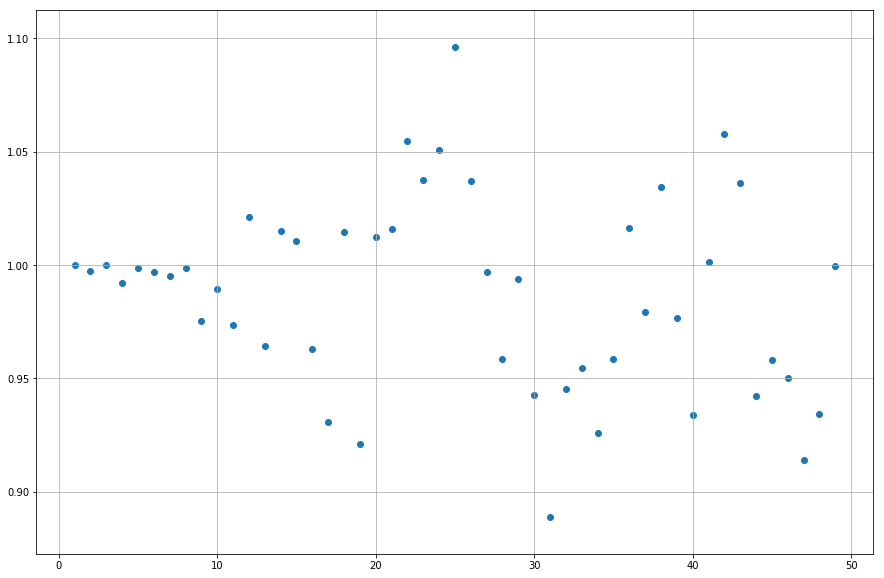

In [85]:
plt.figure(figsize=(15,10))
plt.grid()
plt.scatter(num_traps,np.divide(halfpeaks,peaks))
plt.show()

In [16]:
print(samples)

1000


In [ ]:
'''
Minimization
'''
plt.figure(figsize=(15,10))
x = np.linspace(0,numSamples,numSamples)
fidelity = 1e1
wave = []
phases = [0]
for w in frequencies:
    #Save first cosine wave
    if w==tmin:
        wave = (genWave(w,0))[0]
    else:
        tempwaves = []
        maxima = []
        tempPhases = []
        #Add next wave in series, incrementing the phase
        for i in range(0,tableLength,int(tableLength/fidelity)):
            currTempWave = genWave(w,i/tableLength)
            tempwaves.append(np.add(currTempWave[0],wave))
            maxima.append(np.amax(tempwaves[-1]))
        pind = np.argmin(maxima)
        wave=tempwaves[pind]
        phases.append(pind)
        print(w,pind/fidelity)
plt.show()
plt.figure(figsize=(15,10))
plt.plot(x,np.real(wave))
plt.show()
print(phases)            
            